In [ ]:
from tqdm import tqdm
import scipy.stats as sts
import scipy as sc
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

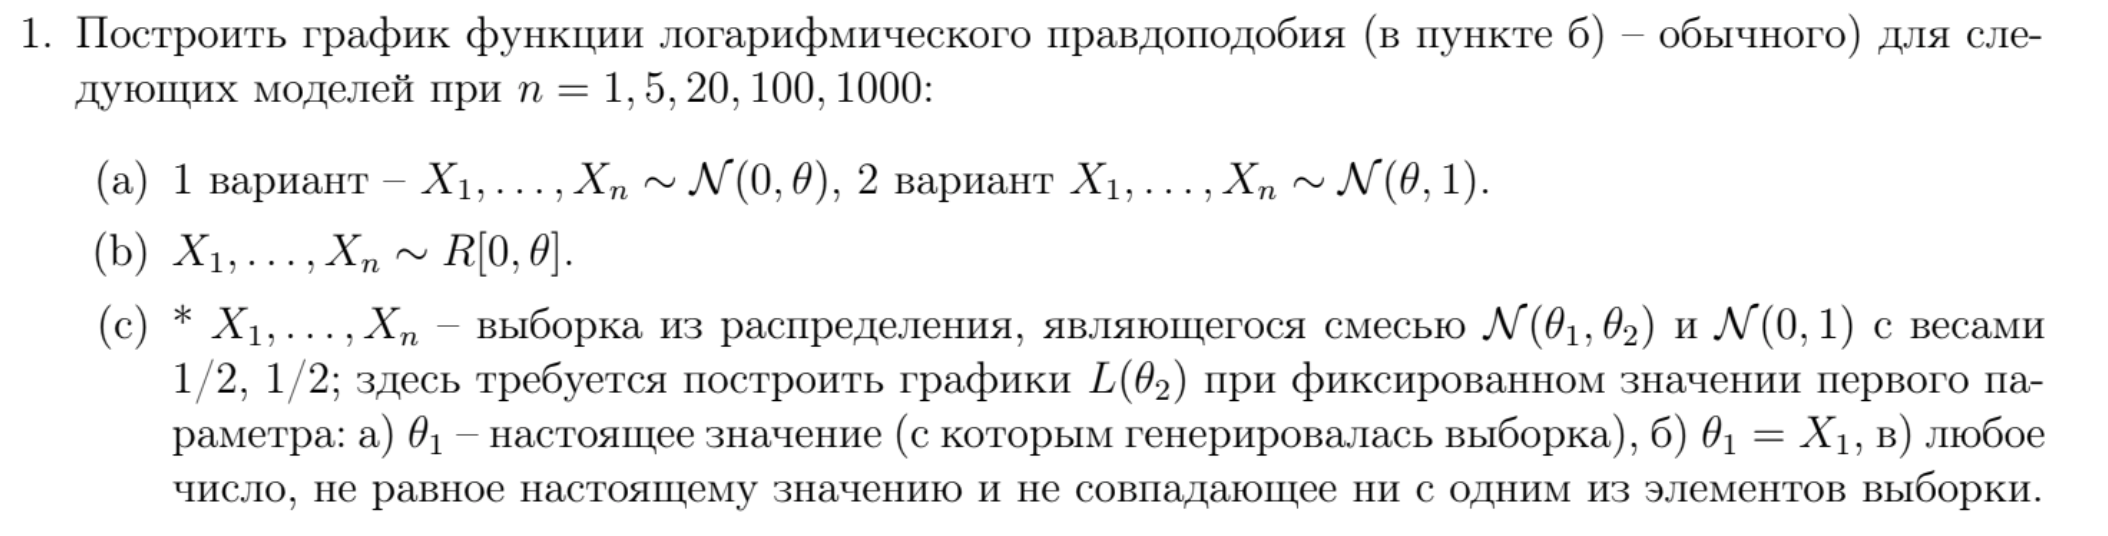

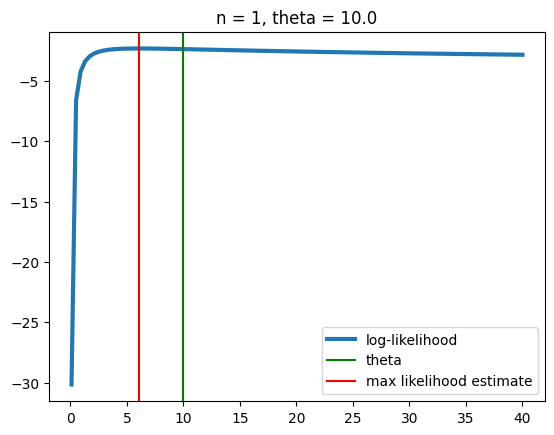

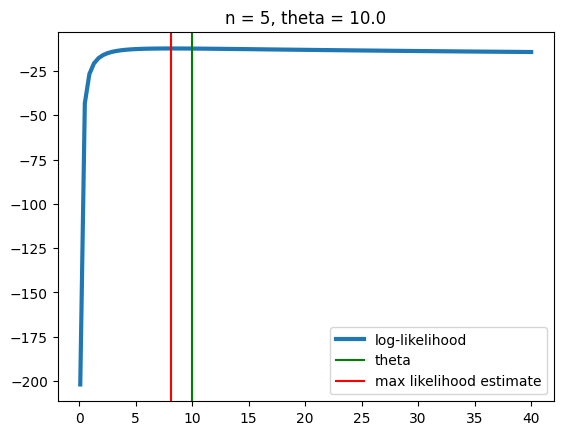

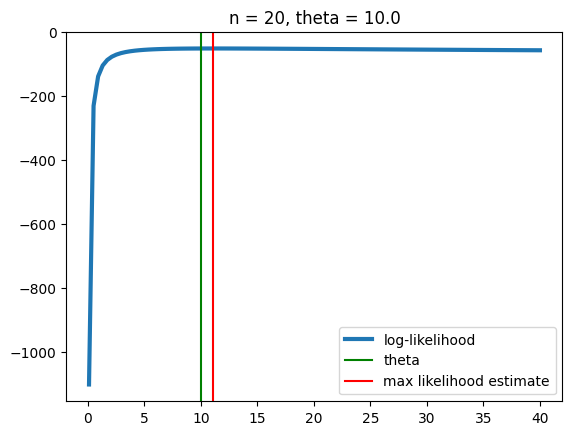

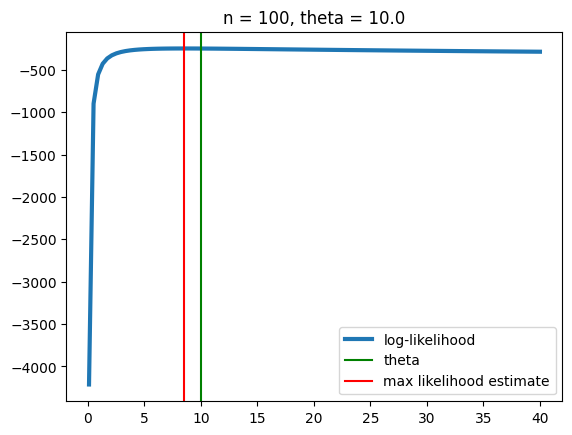

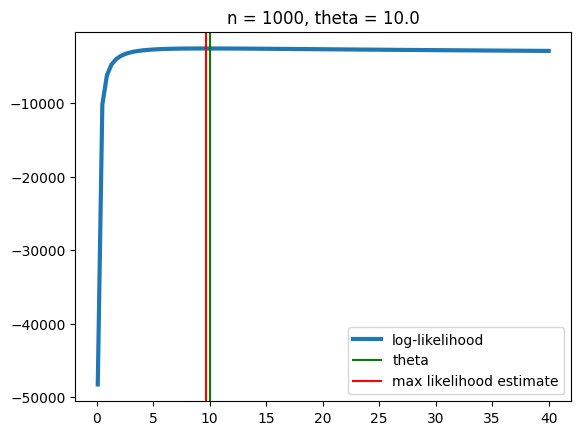

In [ ]:
############## 1 вариант ################
# N = [10,]
N = [1,5,20,100,1000]
def task1a(n:int, theta:float):
    fig,ax = plt.subplots()
    theta_test = np.linspace(0.1,40,100)
    x_test = sts.norm.rvs(loc = 0, scale = np.sqrt(theta), size = n)
    plt.title("n = %d, theta = %0.1f"%(n,theta))
    log_likelihood = [sum(sts.norm.logpdf(x_test, loc = 0, scale = np.sqrt(theta))) for theta in theta_test]
    ax.plot(theta_test, log_likelihood , lw = 3, label ="log-likelihood")
    ax.axvline(theta, color = 'g', label = "theta")
    ax.axvline(np.mean(x_test**2), color = 'r', label = "max likelihood estimate")
    ax.legend()
for n in N:
    task1a(n, 10)

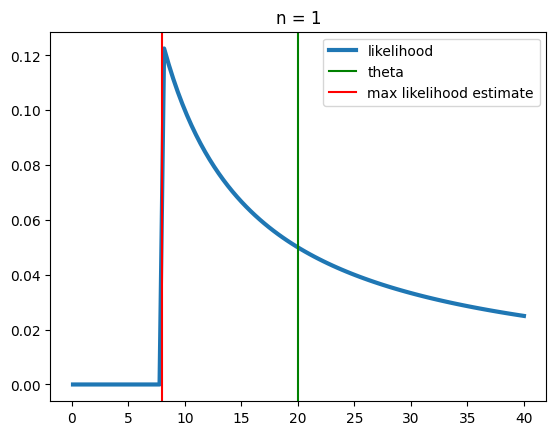

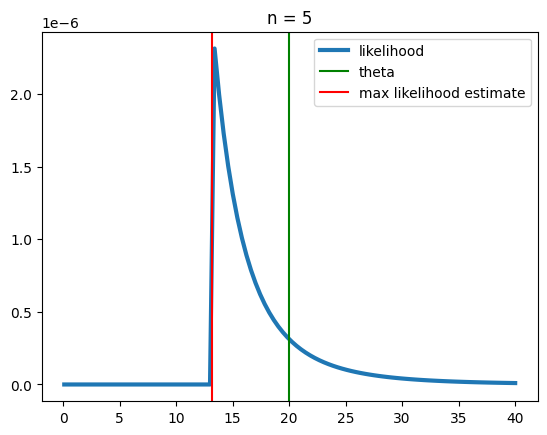

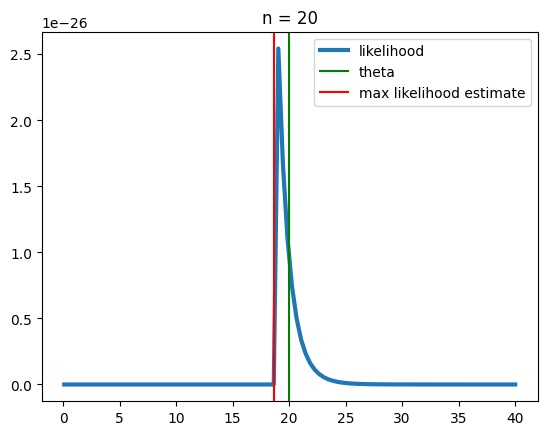

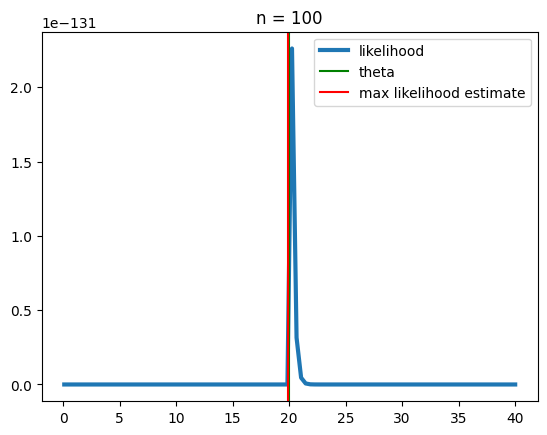

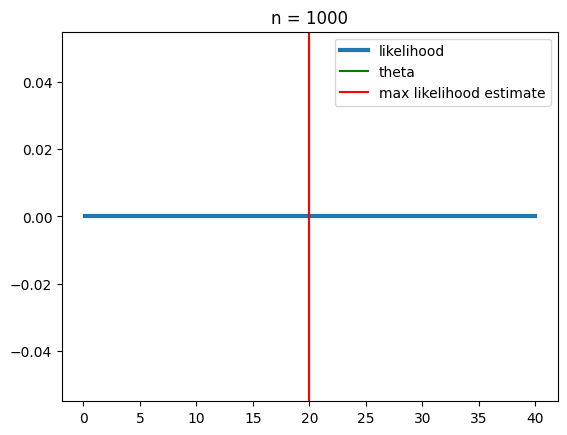

In [ ]:
# N = [1,]
N = [1,5,20,100,1000]
def task1b(n:int, theta:float):
    fig,ax = plt.subplots()
    theta_test = np.linspace(0.1,40,100)
    x_test = sts.uniform.rvs(loc = 0, scale = theta, size = n)
    plt.title("n = %d"%n)
    likelihood = [np.prod(sts.uniform.pdf(x_test,loc=0, scale=theta)) for theta in theta_test]
    ax.plot(theta_test, likelihood, lw = 3, label ="likelihood")
    ax.axvline(theta, color = 'g', label = "theta")
    ax.axvline(np.max(x_test), color = 'r', label = "max likelihood estimate")
    ax.legend()
for n in N:
    task1b(n, 20)

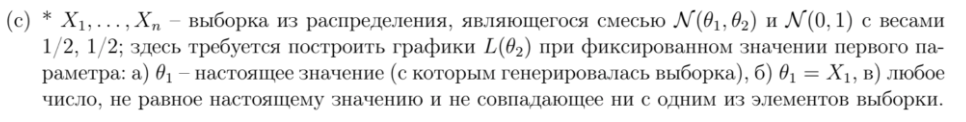

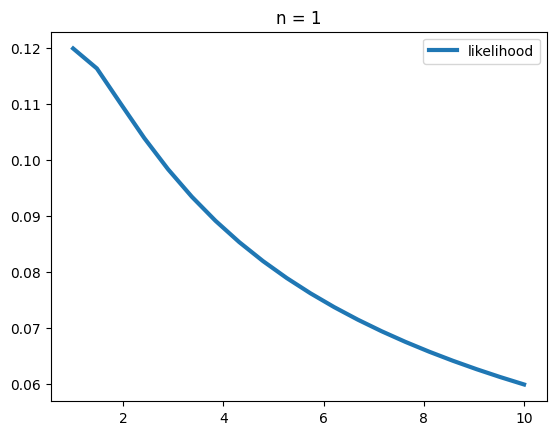

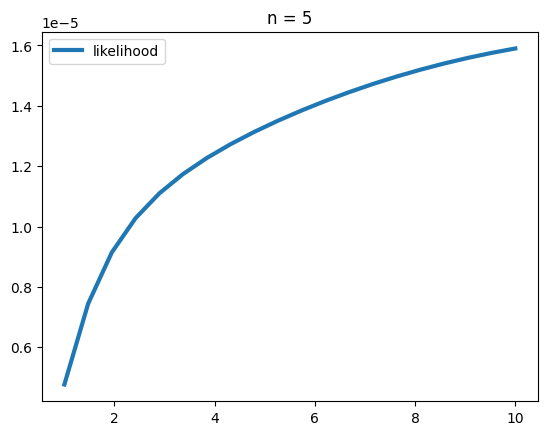

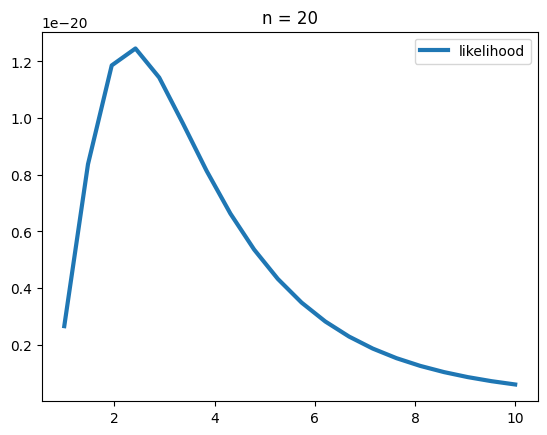

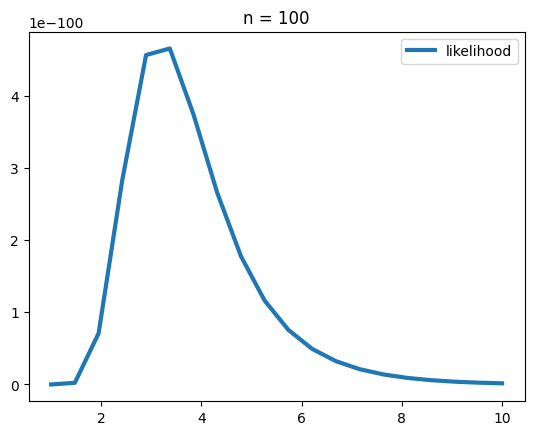

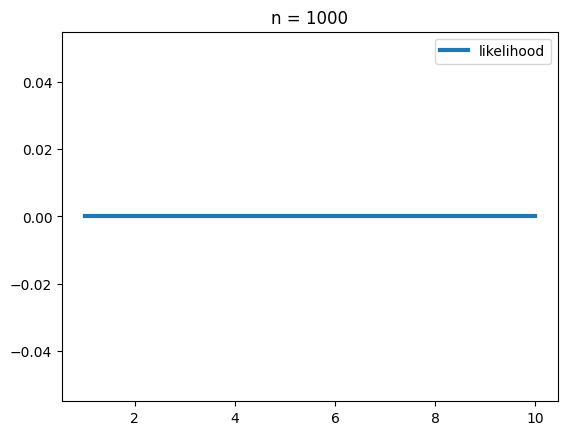

In [ ]:
##### пункт с) плотность смеси = 1/2 * плотность первого + 1/2 на плотность второго.
N = [1,5,20,100,1000]
def generate_mixed_rv(theta1:float, theta2:float, size:int):
    p = sts.bernoulli.rvs(p=1/2, size=size)
    rv = []
    for i in range(size):
        if p[i] == 1:
            rv = np.append(rv, sts.norm.rvs(loc = theta1, scale = np.sqrt(theta2)))
        else:
            rv = np.append(rv, sts.norm.rvs(loc = 0, scale = 1))
    return rv
def mixed_pdf(x:np.array, theta1:float, theta2:float):
    res1 = 1/2 * sts.norm.pdf(x, loc = theta1, scale = np.sqrt(theta2))
    res2 = 1/2 * sts.norm.pdf(x, loc = 0, scale = 1)
    return res1 + res2
def task1c(n:int, theta1:float, theta2:float):
    fig,ax = plt.subplots()
    theta_test = np.linspace(1,10,20)
    x_test = generate_mixed_rv(theta1, theta2, n)
    plt.title("n = %d"%n)
    likelihood = [np.prod(mixed_pdf(x_test, theta1, theta2)) for theta2 in theta_test]
    ax.plot(theta_test, likelihood, lw = 3, label ="likelihood")
    ax.legend()
for n in N:
    task1c(n, 5,5)

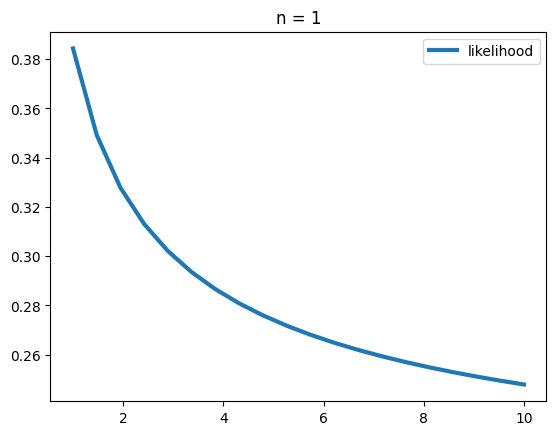

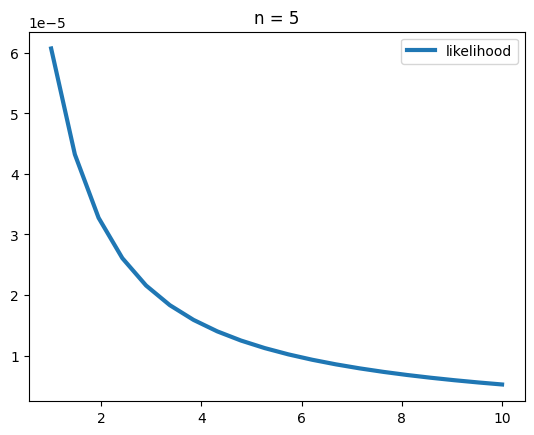

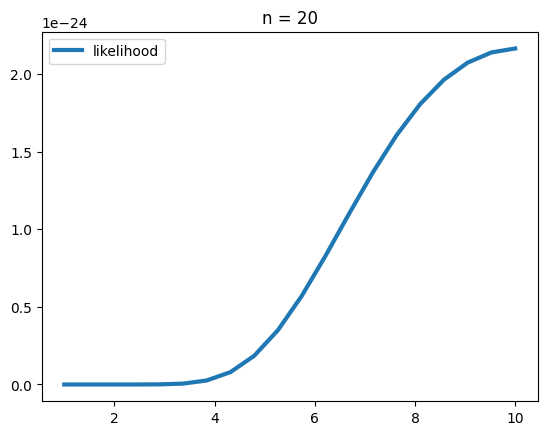

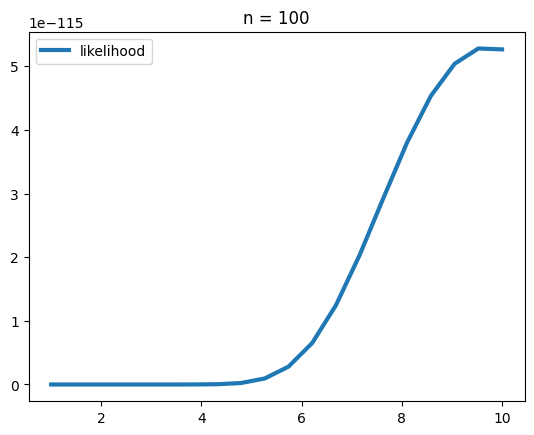

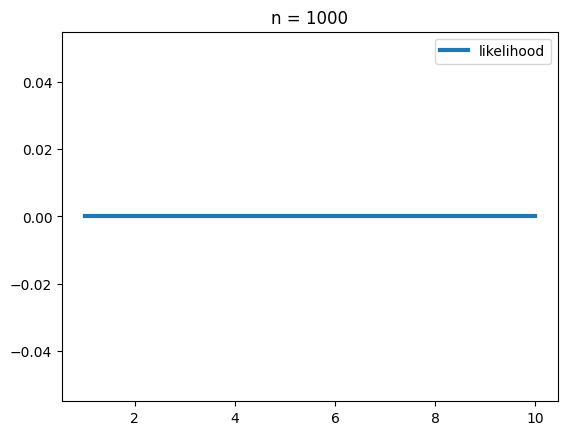

In [ ]:
N = [1,5,20,100,1000]
def task1c_b(n:int, theta1:float, theta2:float):
    fig,ax = plt.subplots()
    theta_test = np.linspace(1,10,20)
    x_test = generate_mixed_rv(theta1, theta2, n)
    theta1 = x_test[0]
    plt.title("n = %d"%n)
    likelihood = [np.prod(mixed_pdf(x_test, theta1, theta2)) for theta2 in theta_test]
    ax.plot(theta_test, likelihood, lw = 3, label ="likelihood")
    ax.legend()
for n in N:
    task1c_b(n, 5,5)

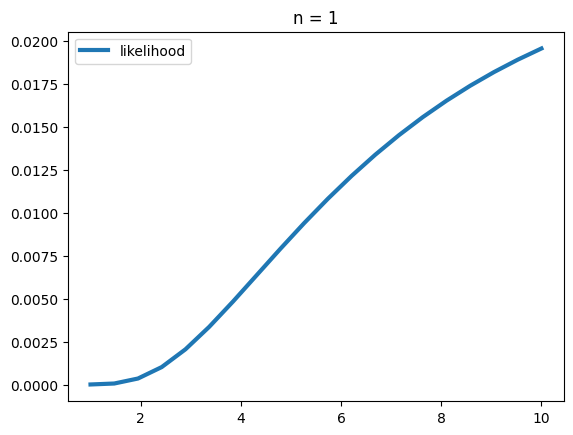

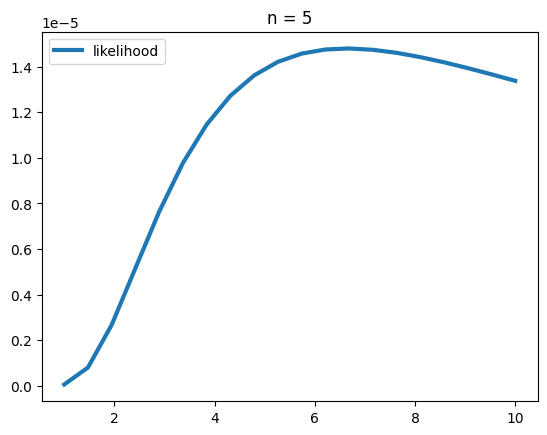

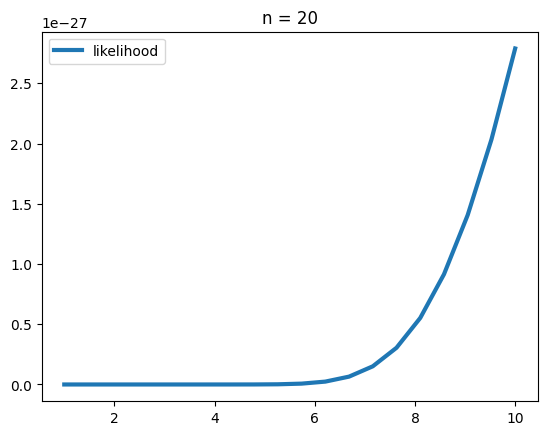

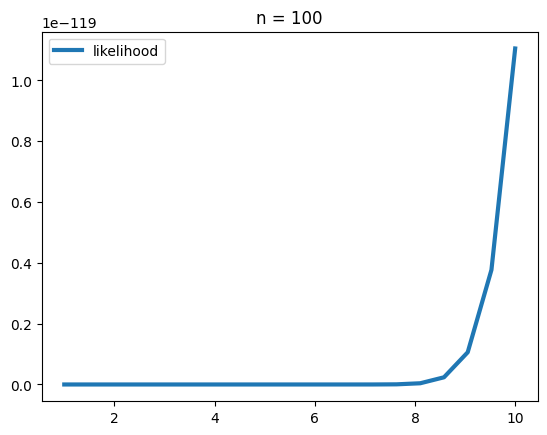

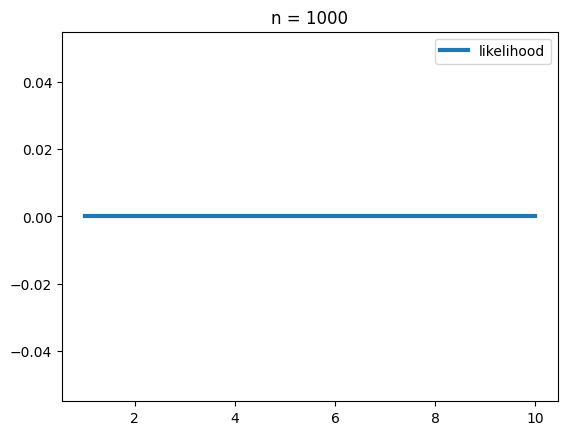

In [ ]:
N = [1,5,20,100,1000]
def task1c_c(n:int, theta1:float, theta2:float):
    fig,ax = plt.subplots()
    theta_test = np.linspace(1,10,20)
    x_test = generate_mixed_rv(theta1, theta2, n)
    theta1 = np.random.uniform(0,1)
    while(np.any(x_test == theta1) != 0):
       theta1 = np.random.uniform(0,1)
    plt.title("n = %d"%n)
    likelihood = [np.prod(mixed_pdf(x_test, theta1, theta2)) for theta2 in theta_test]
    ax.plot(theta_test, likelihood, lw = 3, label ="likelihood")
    ax.legend()
for n in N:
    task1c_c(n, 5,1)

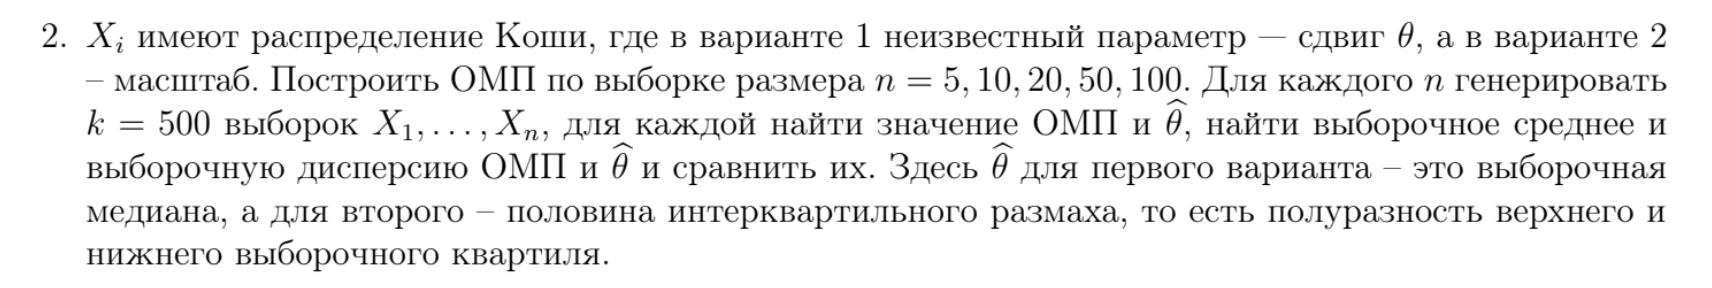

In [ ]:
N = [5,10,20,50,100]
def task2(n:int,k:int, theta:float):
    rvs = sts.cauchy(loc = theta).rvs
    data = sc.sparse.random(k,n, density=1, data_rvs = rvs).toarray()
    ResultMLE = []
    ResultMedian = []
    for i in range (k):
        loc,scale = sts.cauchy.fit(data[i][:], fscale = 1)
        ResultMLE = np.append(ResultMLE, loc)
        ResultMedian.append(np.median(data[i][:]))
    MED_Mean = np.mean(ResultMedian)
    MED_Var = np.var(ResultMedian)
    MLE_Mean = np.mean(ResultMLE)
    MLE_Var = np.var(ResultMLE)
    print("n =", n)
    print("Выборочное среднее MLE:",  MLE_Mean)
    print("Выборочное среднее MED:",  MED_Mean)
    print("Выборочная дисперсия MLE:",  MLE_Var)
    print("Выборочная дисперсия MED:",  MED_Var)
    print("")
for n in N:
    task2(n, 500,1)

n = 5
Выборочное среднее MLE: 0.9494865889509138
Выборочное среднее MED: 0.9752379693215323
Выборочная дисперсия MLE: 1.1426087098694915
Выборочная дисперсия MED: 1.2103264520224448

n = 10
Выборочное среднее MLE: 0.9941312852706833
Выборочное среднее MED: 0.9925866864232983
Выборочная дисперсия MLE: 0.2966206676985839
Выборочная дисперсия MED: 0.33051077100502263

n = 20
Выборочное среднее MLE: 0.9780348476156842
Выборочное среднее MED: 0.976978585028347
Выборочная дисперсия MLE: 0.10099173902544993
Выборочная дисперсия MED: 0.12614334529501514

n = 50
Выборочное среднее MLE: 0.9900435491174204
Выборочное среднее MED: 0.9910212391306934
Выборочная дисперсия MLE: 0.045323424072230306
Выборочная дисперсия MED: 0.05130260247692253

n = 100
Выборочное среднее MLE: 0.9975379191597226
Выборочное среднее MED: 0.9983257409736123
Выборочная дисперсия MLE: 0.021600166456985908
Выборочная дисперсия MED: 0.0254246518131741



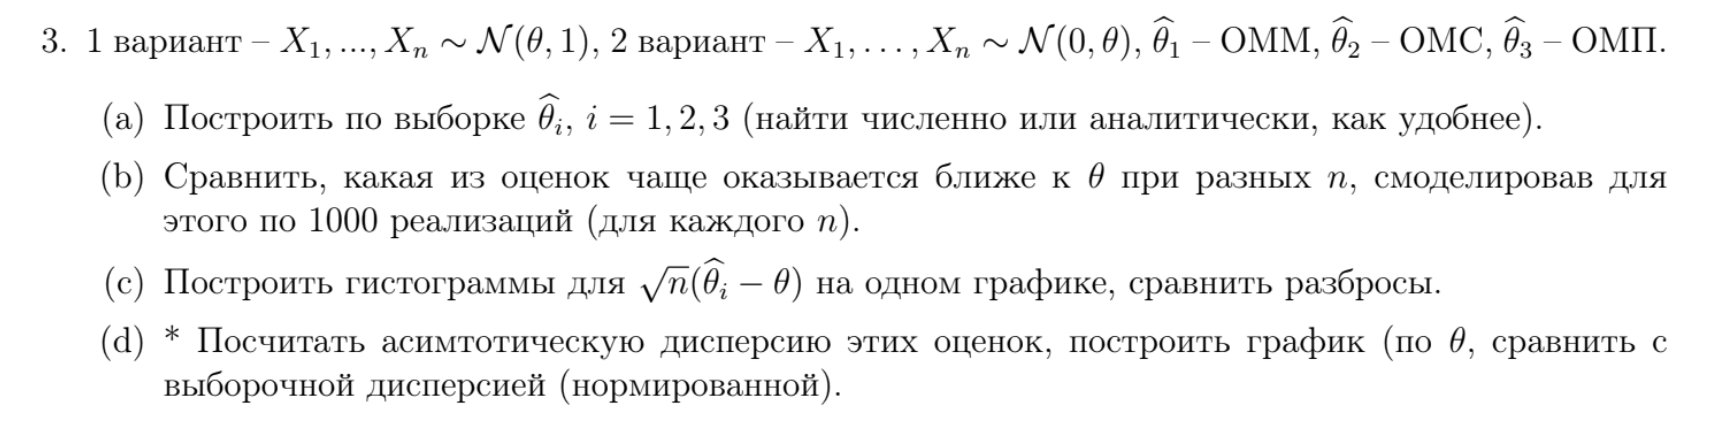

  0%|          | 0/5 [00:00<?, ?it/s]

n =  5
MSE is better than MLE in 51.7% of cases


 40%|████      | 2/5 [00:34<00:51, 17.12s/it]

n =  10
MSE is better than MLE in 50.6% of cases


 60%|██████    | 3/5 [00:50<00:33, 16.53s/it]

n =  20
MSE is better than MLE in 48.4% of cases


 80%|████████  | 4/5 [01:06<00:16, 16.19s/it]

n =  50
MSE is better than MLE in 46.6% of cases
n =  100
MSE is better than MLE in 49.9% of cases


100%|██████████| 5/5 [01:23<00:00, 16.75s/it]


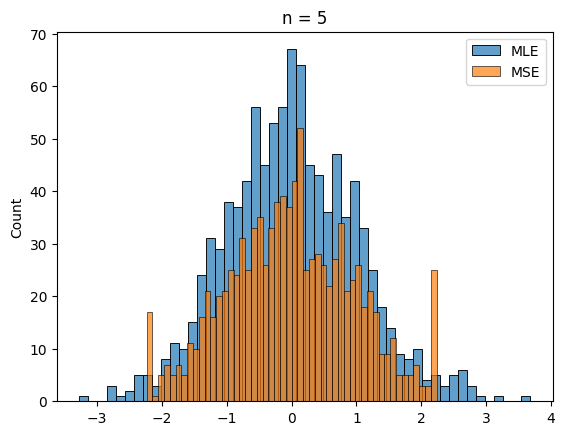

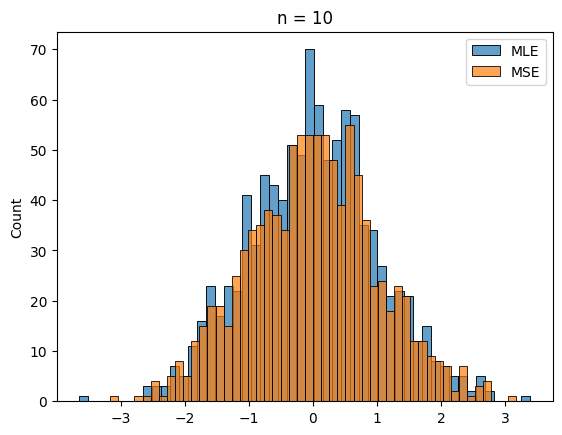

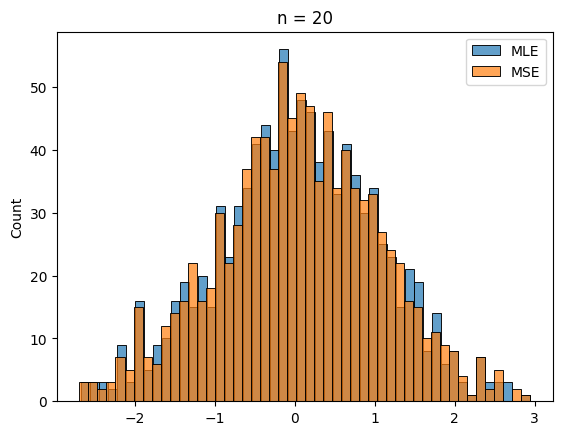

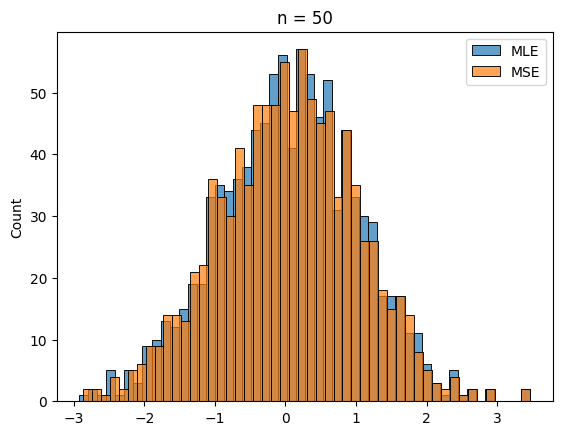

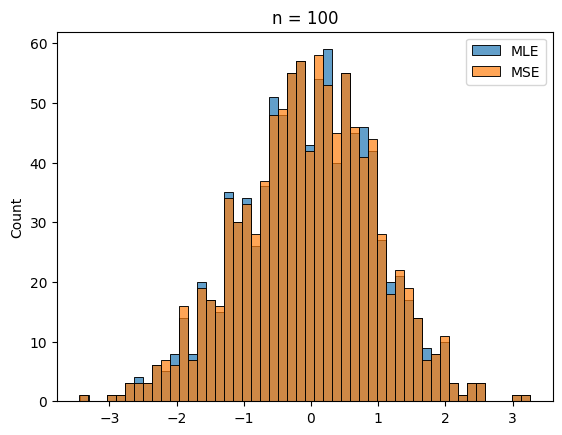

In [ ]:
#### ЗАДАНИЕ 3 ВЕРСИЯ ЧИТЕРСКАЯ
############## 1 вариант ################
N = [5,10,20,50,100]
# N = [2,]
def MLE(x:np.array, theta:float):
    loc, scale = sts.norm.fit(x, method='mle', fscale=1)
    return loc
def calculate_task(n:int, k:int, theta:float):
    rvsNorm = sts.norm(loc = theta, scale = 1).rvs
    data = sc.sparse.random(k,n, density=1, data_rvs = rvsNorm).toarray()
    resMLE = []
    resMSE = []
    bounds = [(theta-1, theta+1),(1,1)]
    for i in range (k):
        resMLE = np.append(resMLE, MLE(data[i], theta))
        #resMSE = np.append(resMSE, MSE(data[i], theta))
        resMSE = np.append(resMSE, np.array(sts.fit(sts.norm, data[i], bounds, method='mse').params)[0])
    return resMLE, resMSE
def task3(n:int,k:int, theta:float):
    fig,ax = plt.subplots()
    plt.title("n = %d"%n)
    resMLE, resMSE = calculate_task(n,k,theta)
    print("n = ", n)
    mles_dev = np.abs(resMLE - theta)
    mses_dev = np.abs(resMSE - theta)
    cmp = mses_dev < mles_dev
    print(f"MSE is better than MLE in {cmp.sum()/k * 100}% of cases")
    varMLE = np.var(resMLE)
    varMSE = np.var(resMSE)

    ax = sns.histplot(np.sqrt(n)*(np.array(resMLE)-theta), bins = 50,label = 'MLE', alpha = 0.7)
    ax = sns.histplot(np.sqrt(n)*(np.array(resMSE)-theta), bins = 50,label = 'MSE', alpha = 0.7)

    ax.legend()
for n in tqdm(N):
    task3(n, 1000,5)

 20%|██        | 1/5 [00:19<01:17, 19.49s/it]

n =  5
MSE is better than MLE in 50.3% of cases
n =  10
MSE is better than MLE in 50.1% of cases


 60%|██████    | 3/5 [00:57<00:38, 19.28s/it]

n =  20
MSE is better than MLE in 50.1% of cases
n =  50
MSE is better than MLE in 48.199999999999996% of cases


100%|██████████| 5/5 [01:38<00:00, 19.75s/it]

n =  100
MSE is better than MLE in 50.0% of cases


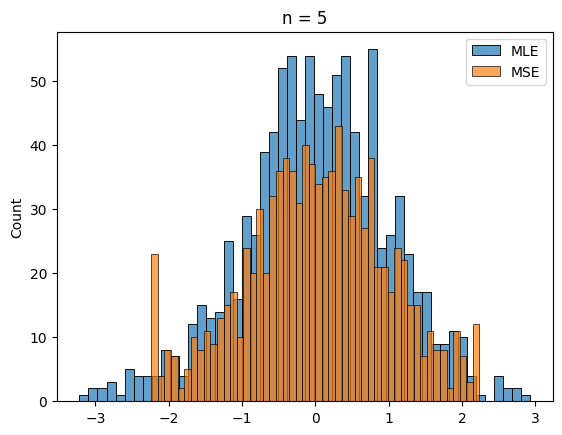

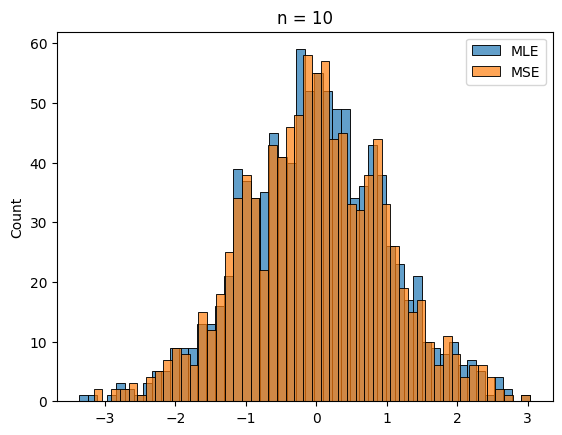

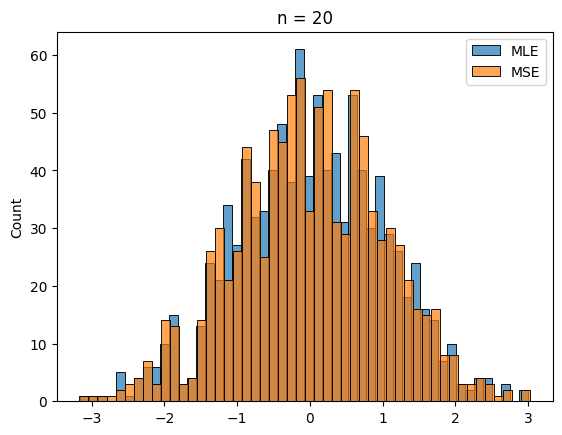

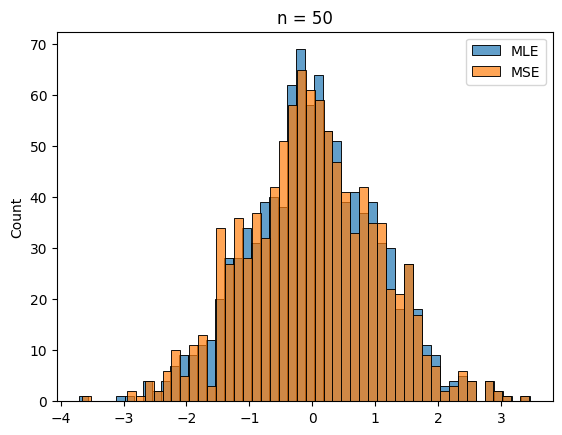

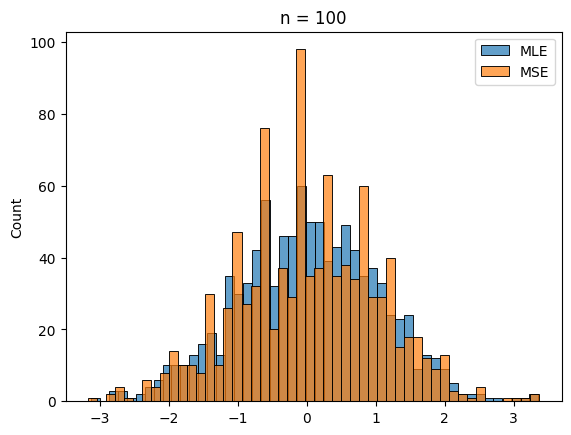

In [ ]:
#### ЗАДАНИЕ 3 ВЕРСИЯ РУЧНАЯ
############## 1 вариант ################
N = [5,10,20,50,100]
# N = [5,]
def D(x_sorted:np.array, theta:float):
    F = sts.norm.cdf(x_sorted, loc = theta, scale = 1)
    F_diffed = np.diff(F)
    res = F[0]*(1 - F[n-1])*np.prod(F_diffed)
    return res
def MSE(x:np.array, theta_test:np.array):
    x_sorted = np.sort(x)
    res = np.argmax([D(x_sorted, theta1) for theta1 in theta_test])
    return theta_test[res]
def MLE(x:np.array):
    loc, scale = sts.norm.fit(x, method='mle', fscale=1)
    return loc
def calculate_task(n:int, k:int, theta:float):
    rvsNorm = sts.norm(loc = theta, scale = 1).rvs
    data = sc.sparse.random(k,n, density=1, data_rvs = rvsNorm).toarray()
    resMLE = []
    resMSE = []
    theta_test = np.linspace(theta-1,theta+1,200)
    for i in range (k):
        resMLE = np.append(resMLE, MLE(data[i]))
        resMSE = np.append(resMSE, MSE(data[i], theta_test))
    return resMLE, resMSE
def task3(n:int,k:int, theta:float):
    fig,ax = plt.subplots()
    resMLE, resMSE = calculate_task(n,k,theta)
    plt.title("n = %d"%n)
    print("n = ", n)
    mles_dev = np.abs(resMLE - theta)
    mses_dev = np.abs(resMSE - theta)
    cmp = mses_dev < mles_dev
    print(f"MSE is better than MLE in {cmp.sum()/k * 100}% of cases")

    ax = sns.histplot(np.sqrt(n)*(np.array(resMLE)-theta), bins = 50,label = 'MLE', alpha = 0.7)
    ax = sns.histplot(np.sqrt(n)*(np.array(resMSE)-theta), bins = 50,label = 'MSE', alpha = 0.7)

    ax.legend()
for n in tqdm(N):
    task3(n, 1000,5)

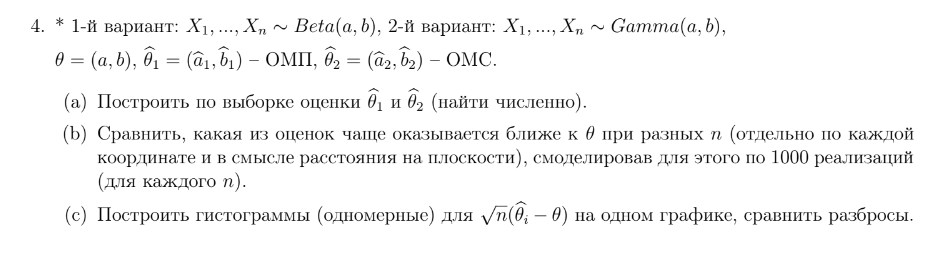

MLE: [0.9461387211791888, 1.8355176542492622]
MSE: [0.9375469444242743, 1.817123971032631]
MSE is better than MLE in for approximating 'a' in 49.5% of cases
MSE is better than MLE in for approximating 'b' in 46.9% of cases
MSE is better than MLE in for approximating distance in 48.6% of cases


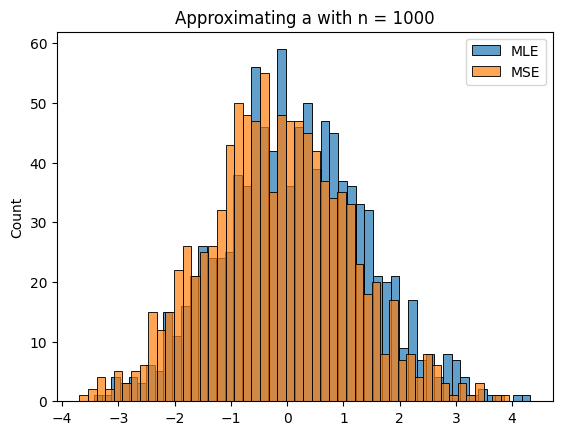

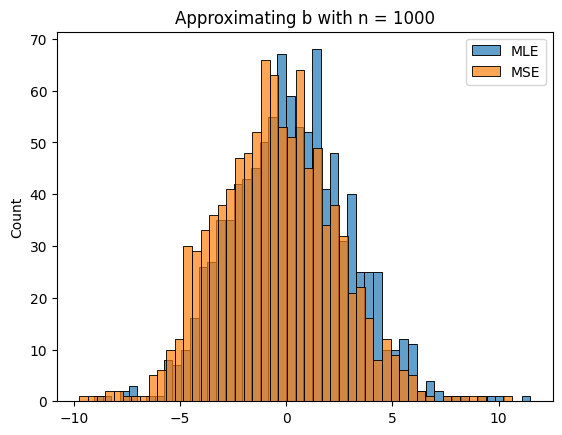

In [ ]:
## 1 вариант
a, b = 1, 2
n = 1000
k= 1000
def MLE(x:np.array, A:float, B:float):
    a, b, loc, scale = sts.beta.fit(x, method='mle', fscale=1, floc=0)
    return [[a, b]]
def MSE(x:np.array, A:float, B:float):
    bounds = [(A-0.5, A+0.5),(B-0.5, B+0.5),(0,0),(1,1)]
    a, b, loc, scale = np.array(sts.fit(sts.beta, x, bounds, method='mse').params)
    return [[a, b]]
X = sts.beta(a,b).rvs(n)
mle_res = MLE(X, a, b)[0]
mse_res = MSE(X, a, b)[0]
print(f"MLE: {mle_res}")
print(f"MSE: {mse_res}")

def compare(a:float, b:float, n:int, k:int):
    rvsBeta = sts.beta(a=a, b=b).rvs
    data = sc.sparse.random(k,n, density=1, data_rvs = rvsBeta).toarray()
    resMLE =  MLE(data[0], a, b)
    resMSE = MLE(data[0], a, b)
    for i in range (1,k):
        resMLE = np.append(resMLE, MLE(data[i], a, b), axis=0)
        resMSE = np.append(resMSE, MSE(data[i], a, b), axis=0)
    mles_dev_a = np.abs(resMLE[:,0] - a)
    mses_dev_a = np.abs(resMSE[:,0] - a)

    mles_dev_b = np.abs(resMLE[:,1] - b)
    mses_dev_b = np.abs(resMSE[:,1] - b)

    mses_dist = np.array([np.linalg.norm(x - np.array([a,b])) for x in resMSE])
    mles_dist = np.array([np.linalg.norm(x - np.array([a,b])) for x in resMLE])

    cmp_a = mses_dev_a < mles_dev_a
    cmp_b = mses_dev_b < mles_dev_b
    cmp_dist = mses_dist < mles_dist

    print(f"MSE is better than MLE in for approximating 'a' in {cmp_a.sum()/k * 100}% of cases")
    print(f"MSE is better than MLE in for approximating 'b' in {cmp_b.sum()/k * 100}% of cases")
    print(f"MSE is better than MLE in for approximating distance in {cmp_dist.sum()/k * 100}% of cases")

    fig,ax = plt.subplots()
    plt.title(f"Approximating a with n = {n}")
    ax = sns.histplot(np.sqrt(n)*(resMLE[:,0]-a), bins = 50,label = 'MLE', alpha = 0.7)
    ax = sns.histplot(np.sqrt(n)*(resMSE[:,0]-a), bins = 50,label = 'MSE', alpha = 0.7)
    ax.legend()

    fig,ax = plt.subplots()
    plt.title(f"Approximating b with n = {n}")
    ax = sns.histplot(np.sqrt(n)*(resMLE[:,1]-b), bins = 50,label = 'MLE', alpha = 0.7)
    ax = sns.histplot(np.sqrt(n)*(resMSE[:,1]-b), bins = 50,label = 'MSE', alpha = 0.7)
    ax.legend()

compare(a, b, n, k)